# PROJECT KCB AI

### OPTIMIZING MACHINE LEARNING MODEL TO PREDICT STUDENT DROPOUT AND ACADEMIC SUCCESS WITH SUPERVISED LEARNING METHOD – CLASSIFICATION

In [1]:
# import all necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

# import library untuk encoder
from sklearn.preprocessing import LabelEncoder

# import library untuk scaling
from sklearn.preprocessing import MinMaxScaler

#library untuk model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

dataset : https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [2]:
df = pd.read_csv("data.csv", delimiter = ";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


## PREPROCESSING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

> Tidak ada missing & Null values

In [8]:
df = df.rename(columns = {"Nacionality" : "Nationality"})

> kelompokkan data numerical dan categoricalnya.

In [9]:
df["Age at enrollment"].head()

0    20
1    19
2    19
3    20
4    45
Name: Age at enrollment, dtype: int64

> Kita hapus target enrolled karena kita ingin predict dropout atau graduate.

In [10]:
df = df.drop(df[df['Target']=='Enrolled'].index)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
# cek proporsi target
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [12]:
df_cat = df.select_dtypes(['object'])
df_num = df.drop(columns = df_cat.columns)

In [13]:
df_cat.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


In [14]:
df_num.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


### DETECTING & HANDLING OUTLIERS

> Kita cek outliersnya

In [15]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

> Kita akan cek pada nilai kontinu saja.

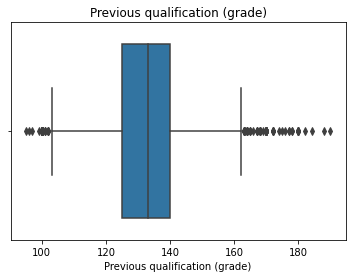

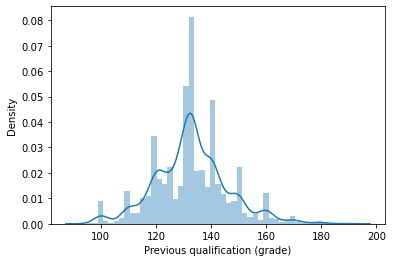

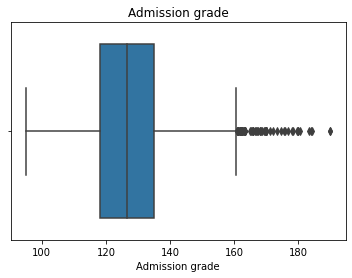

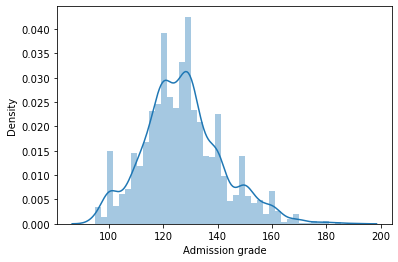

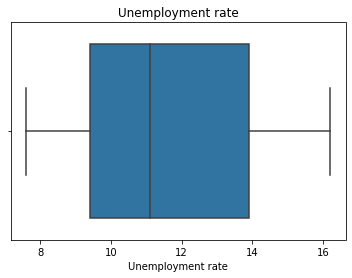

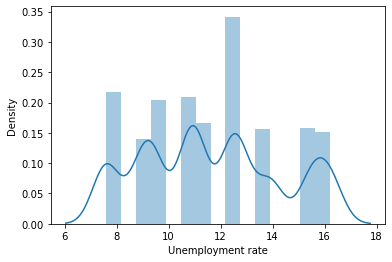

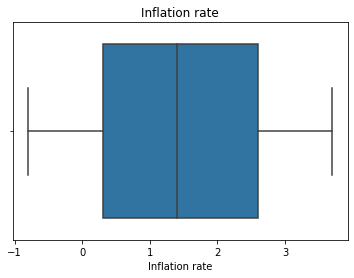

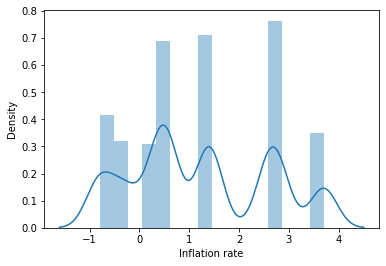

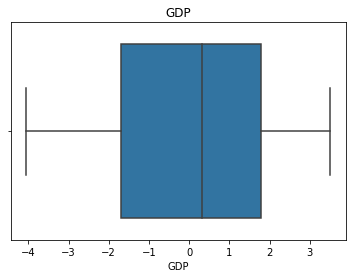

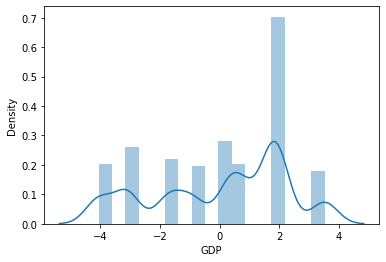

In [16]:
for i in df[["Previous qualification (grade)", "Admission grade", "Unemployment rate", "Inflation rate", "GDP"]]:
    plt.title(i)
    sns.boxplot(df_num[i])
    plt.show()
    sns.distplot(df_num[i])
    plt.show()

> Data terlihat masih aman, tidak terdistribusi dengan normal, dan tidak terlihat adanya outliers / nilai extreme.

## Feature Engineering

### Feature Encoding

> Kita akan encode targetnya menggunakan label encoder

In [17]:
label_encoder = LabelEncoder()

In [18]:
df_cat["Target"] = label_encoder.fit_transform(df_cat["Target"])

In [19]:
df_cat.head()

,Target
0,0
1,1
2,0
3,1
4,1


In [20]:
list(label_encoder.classes_)

['Dropout', 'Graduate']

### Feature Scaling

> Kita buat df2 untuk model decision tree, karena decision tree tidak perlu discaling

In [21]:
df2 = pd.concat([df_num, df_cat], axis = 1)

> Data tidak terdistribusi normal & tidak terlihat adanya outliers. <br>
> Disini kami akan melakukan scaling pada data kontinu mengggunakan MinMaxScaler().

In [22]:
# min max scaler
scaler = MinMaxScaler()

In [23]:
column_name = ["Previous qualification (grade)", "Admission grade", "Unemployment rate", "Inflation rate", "GDP"]

In [24]:
for i in column_name:
    df_num[i] = scaler.fit_transform(df_num[[i]])

In [25]:
df_num[column_name].head()

,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP
0,0.284211,0.340000,0.372093,0.488889,0.766182
1,0.684211,0.500000,0.732558,0.111111,0.640687
2,0.284211,0.313684,0.372093,0.488889,0.766182
3,0.284211,0.258947,0.209302,0.000000,0.124174
4,0.052632,0.489474,0.732558,0.111111,0.640687


### Feature Selection

In [26]:
df1 = pd.concat([df_num, df_cat], axis = 1)

In [27]:
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,0.284211,1,19,12,...,0,0,0,0,0.000000,0,0.372093,0.488889,0.766182,0
1,1,15,1,9254,1,1,0.684211,1,1,3,...,0,6,6,6,13.666667,0,0.732558,0.111111,0.640687,1
2,1,1,5,9070,1,1,0.284211,1,37,37,...,0,6,0,0,0.000000,0,0.372093,0.488889,0.766182,0
3,1,17,2,9773,1,1,0.284211,1,38,37,...,0,6,10,5,12.400000,0,0.209302,0.000000,0.124174,1
4,2,39,1,8014,0,1,0.052632,1,37,38,...,0,6,6,6,13.000000,0,0.732558,0.111111,0.640687,1


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nationality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

#### EMBEDDED METHOD (FEATURE IMPORTANCES)

In [29]:
# split dependent dan independent (target)
X = df1.drop(columns=["Target"])# independent feature, non target
y = df1["Target"] # target

In [30]:
# embedded method dengan ExtraTree
model = ExtraTreesClassifier()
model.fit(X,y) # fit model
print(model.feature_importances_) # gunakan inbuilt class: feature_importances

[0.00452576 0.02266604 0.01284607 0.02617671 0.00414008 0.00559511
 0.01824004 0.00254885 0.01560084 0.01528631 0.0147293  0.01678107
 0.02005632 0.01017788 0.00143494 0.03325746 0.08599094 0.02285631
 0.0345622  0.02224746 0.00209417 0.00769179 0.01814645 0.02355513
 0.07573749 0.08575432 0.00562321 0.00686151 0.01680269 0.02714933
 0.1186466  0.17269843 0.00515403 0.01552027 0.01446463 0.01438026]


In [31]:
# hasil feature importances
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

In [32]:
feat_importances.nlargest(36)

Curricular units 2nd sem (grade)                  0.172698
Curricular units 2nd sem (approved)               0.118647
Tuition fees up to date                           0.085991
Curricular units 1st sem (grade)                  0.085754
Curricular units 1st sem (approved)               0.075737
Scholarship holder                                0.034562
Debtor                                            0.033257
Curricular units 2nd sem (evaluations)            0.027149
Course                                            0.026177
Curricular units 1st sem (evaluations)            0.023555
Gender                                            0.022856
Application mode                                  0.022666
Age at enrollment                                 0.022247
Admission grade                                   0.020056
Previous qualification (grade)                    0.018240
Curricular units 1st sem (enrolled)               0.018146
Curricular units 2nd sem (enrolled)               0.0168

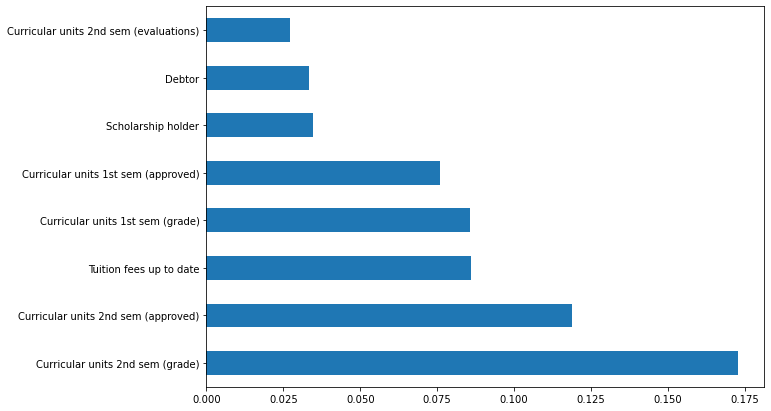

In [33]:
# plot hasil feature importances
plt.figure(figsize = (10,7))
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [34]:
# masukkan hasil kedalam dataframe baru.
col = feat_importances.nlargest(8).index.tolist()

col.append("Target")

df1 = df1[col]
df2 = df2[col]

In [35]:
df1.head()

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Target
0,0.000000,0,1,0.000000,0,0,0,0,0
1,13.666667,6,0,14.000000,6,0,0,6,1
2,0.000000,0,0,0.000000,0,0,0,0,0
3,12.400000,5,1,13.428571,6,0,0,10,1
4,13.000000,6,1,12.333333,5,0,0,6,1


In [36]:
df2.head()

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Target
0,0.000000,0,1,0.000000,0,0,0,0,0
1,13.666667,6,0,14.000000,6,0,0,6,1
2,0.000000,0,0,0.000000,0,0,0,0,0
3,12.400000,5,1,13.428571,6,0,0,10,1
4,13.000000,6,1,12.333333,5,0,0,6,1


> Convert data ke csv untuk digunakan di section hyperparameter

In [37]:
df_ready_log = df1.copy()

In [38]:
df_ready_log.head()

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Target
0,0.000000,0,1,0.000000,0,0,0,0,0
1,13.666667,6,0,14.000000,6,0,0,6,1
2,0.000000,0,0,0.000000,0,0,0,0,0
3,12.400000,5,1,13.428571,6,0,0,10,1
4,13.000000,6,1,12.333333,5,0,0,6,1


In [39]:
df_ready_log.to_csv("df_ready_log.csv", index = False)

> Buat data terpisah untuk model yg tidak memerlukan scaling data seperti Decision Tree, dll.

In [40]:
df_ready_dec = df2.copy()

In [41]:
df_ready_dec.head()

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Target
0,0.000000,0,1,0.000000,0,0,0,0,0
1,13.666667,6,0,14.000000,6,0,0,6,1
2,0.000000,0,0,0.000000,0,0,0,0,0
3,12.400000,5,1,13.428571,6,0,0,10,1
4,13.000000,6,1,12.333333,5,0,0,6,1


In [42]:
df_ready_dec.to_csv("df_ready_dec.csv", index = False)

## MODELING

#### LOGISTIC

In [43]:
# split target variable
X = df_ready_log.drop(columns = 'Target')
y = df_ready_log['Target']

In [44]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [45]:
# model train dan fitting
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
# model train dan fitting
model_tuned = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter=1000, l1_ratio = 1, C=  0.1)
model_tuned.fit(X_train, y_train)

LogisticRegression(C=0.1, l1_ratio=1, max_iter=1000, penalty='none',
                   solver='newton-cg')

In [47]:
# buat ypredict base model
y_pred_log = model.predict(X_test)

In [48]:
# buat ypredict tuned model
y_pred_log_tuned = model_tuned.predict(X_test)

In [49]:
# buat df untuk store hasil actual vs pred
result_base = pd.DataFrame()
result_base["y_act"] = y_test
result_base["y_pred"] = y_pred_log_tuned

In [50]:
# buat df untuk store hasil actual vs pred
result_tuned = pd.DataFrame()
result_tuned["y_act"] = y_test
result_tuned["y_pred"] = y_pred_log_tuned

In [51]:
# concat result
result_base = pd.concat([X_test, result_base], axis = 1)

In [52]:
# concat result
result_tuned = pd.concat([X_test, result_tuned], axis = 1)

In [53]:
#cek hasil logistic sebelum ditune
result_base

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),y_act,y_pred
365,15.750000,6,1,16.153846,6,1,0,10,1,1
112,12.800000,5,1,13.400000,5,0,0,5,1,1
1492,10.500000,2,1,10.750000,4,0,0,12,0,0
1086,13.666667,6,1,13.666667,6,1,0,9,1,1
4265,12.428571,6,1,13.166667,6,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1190,0.000000,0,1,0.000000,0,0,0,9,0,0
2839,15.500000,6,1,17.000000,6,0,0,6,1,1
3503,11.750000,4,1,11.714286,6,1,0,8,1,1
883,11.428571,6,0,13.000000,3,0,1,14,0,0


In [54]:
#cek hasil logistic setelah ditune
result_tuned

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),y_act,y_pred
365,15.750000,6,1,16.153846,6,1,0,10,1,1
112,12.800000,5,1,13.400000,5,0,0,5,1,1
1492,10.500000,2,1,10.750000,4,0,0,12,0,0
1086,13.666667,6,1,13.666667,6,1,0,9,1,1
4265,12.428571,6,1,13.166667,6,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1190,0.000000,0,1,0.000000,0,0,0,9,0,0
2839,15.500000,6,1,17.000000,6,0,0,6,1,1
3503,11.750000,4,1,11.714286,6,1,0,8,1,1
883,11.428571,6,0,13.000000,3,0,1,14,0,0


##### CONFUSION MATRIX

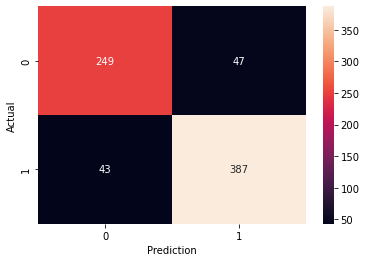

In [55]:
# plot confusion matrix base model
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

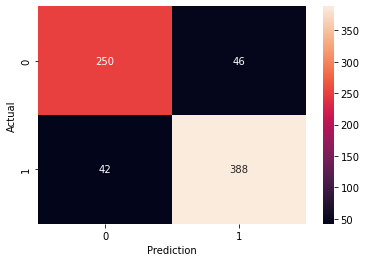

In [56]:
# plot confusion matrix tuned model
sns.heatmap(confusion_matrix(y_test, y_pred_log_tuned), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

##### MODEL EVALUATION

In [57]:
#base model base model
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       296
           1       0.89      0.90      0.90       430

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



In [58]:
#base model tuned model
print(classification_report(y_test, y_pred_log_tuned))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       296
           1       0.89      0.90      0.90       430

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



In [59]:
# fungsi untuk cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)
    
    return scores_train.mean(), scores_test["test_score"].mean()

In [60]:
# Accuracy base model
print("CV Accuracy :", cv_score(model, X_train, y_train, "accuracy",5))

CV Accuracy : (0.8887791560329991, 0.8901560923496943)


In [61]:
# Accuracy tuned model
print("CV Accuracy :", cv_score(model_tuned, X_train, y_train, "accuracy",5))

CV Accuracy : (0.8891239836192059, 0.8894682176983796)


#### DECISION TREE

In [62]:
# split target variable
X = df_ready_dec.drop(columns = 'Target')
y = df_ready_dec['Target']

In [63]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [64]:
# model train dan fitting
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
# model train dan fitting
model_tuned =DecisionTreeClassifier(splitter = 'random', min_samples_split = 9, min_samples_leaf=6, max_depth = 8, criterion=  'entropy')
model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=6,
                       min_samples_split=9, splitter='random')

In [66]:
# buat ypredict
y_pred_dec = model.predict(X_test)

In [67]:
# buat ypredict
y_pred_dec_tuned = model_tuned.predict(X_test)

In [68]:
# buat df untuk store hasil actual vs pred
result_base = pd.DataFrame()
result_base["y_act"] = y_test
result_base["y_pred"] = y_pred_dec_tuned

In [69]:
# buat df untuk store hasil actual vs pred
result_tuned = pd.DataFrame()
result_tuned["y_act"] = y_test
result_tuned["y_pred"] = y_pred_dec_tuned

In [70]:
# concat result
result_base = pd.concat([X_test, result_base], axis = 1)

In [71]:
# concat result
result_tuned = pd.concat([X_test, result_tuned], axis = 1)

In [72]:
#cek hasil decision sebelum ditune
result_base

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),y_act,y_pred
365,15.750000,6,1,16.153846,6,1,0,10,1,1
112,12.800000,5,1,13.400000,5,0,0,5,1,1
1492,10.500000,2,1,10.750000,4,0,0,12,0,0
1086,13.666667,6,1,13.666667,6,1,0,9,1,1
4265,12.428571,6,1,13.166667,6,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1190,0.000000,0,1,0.000000,0,0,0,9,0,0
2839,15.500000,6,1,17.000000,6,0,0,6,1,1
3503,11.750000,4,1,11.714286,6,1,0,8,1,1
883,11.428571,6,0,13.000000,3,0,1,14,0,0


In [73]:
#cek hasil decision setelah ditune
result_tuned

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),y_act,y_pred
365,15.750000,6,1,16.153846,6,1,0,10,1,1
112,12.800000,5,1,13.400000,5,0,0,5,1,1
1492,10.500000,2,1,10.750000,4,0,0,12,0,0
1086,13.666667,6,1,13.666667,6,1,0,9,1,1
4265,12.428571,6,1,13.166667,6,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1190,0.000000,0,1,0.000000,0,0,0,9,0,0
2839,15.500000,6,1,17.000000,6,0,0,6,1,1
3503,11.750000,4,1,11.714286,6,1,0,8,1,1
883,11.428571,6,0,13.000000,3,0,1,14,0,0


##### CONFUSION MATRIX

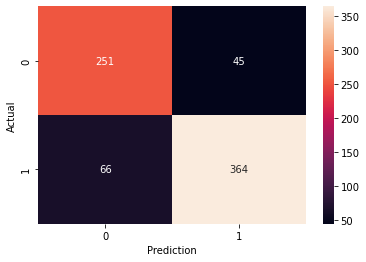

In [74]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dec), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

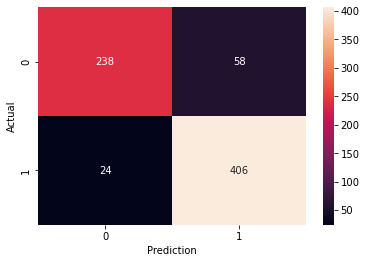

In [75]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dec_tuned), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

##### MODEL EVALUATION

In [76]:
#base model
print(classification_report(y_test, y_pred_dec))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       296
           1       0.89      0.85      0.87       430

    accuracy                           0.85       726
   macro avg       0.84      0.85      0.84       726
weighted avg       0.85      0.85      0.85       726



In [77]:
#tuned model
print(classification_report(y_test, y_pred_dec_tuned))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       296
           1       0.88      0.94      0.91       430

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [78]:
# Accuracy base model
print("CV Accuracy :", cv_score(model, X_train, y_train, "accuracy",5))

CV Accuracy : (0.8598628998753636, 0.8605454329633806)


In [79]:
# Accuracy tuned model
print("CV Accuracy :", cv_score(model_tuned, X_train, y_train, "accuracy",5))

CV Accuracy : (0.8856774882782361, 0.8870615466793282)


#### GRADIENTBOOSTINGCLASSIFIER

In [80]:
# split target variable
X = df_ready_dec.drop(columns = 'Target')
y = df_ready_dec['Target']

In [81]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [82]:
# model train dan fitting
model =GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [83]:
# model train dan fitting
model_tuned =GradientBoostingClassifier(n_estimators = 200, max_depth = 7, learning_rate=0.01, min_samples_split = 5, min_samples_leaf=  4, max_features = 'sqrt', subsample = 1.0)
model_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features='sqrt',
                           min_samples_leaf=4, min_samples_split=5,
                           n_estimators=200)

In [84]:
# buat ypredict
y_pred_gb = model.predict(X_test)

In [85]:
# buat ypredict
y_pred_gb_tuned = model_tuned.predict(X_test)

In [86]:
# buat df untuk store hasil actual vs pred
result_base = pd.DataFrame()
result_base["y_act"] = y_test
result_base["y_pred"] = y_pred_gb_tuned

In [87]:
# buat df untuk store hasil actual vs pred
result_tuned = pd.DataFrame()
result_tuned["y_act"] = y_test
result_tuned["y_pred"] = y_pred_gb_tuned

In [88]:
# concat result
result_base = pd.concat([X_test, result_base], axis = 1)

In [89]:
# concat result
result_tuned = pd.concat([X_test, result_tuned], axis = 1)

In [90]:
#cek hasil gbc sebelum ditune
result_base

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),y_act,y_pred
365,15.750000,6,1,16.153846,6,1,0,10,1,1
112,12.800000,5,1,13.400000,5,0,0,5,1,1
1492,10.500000,2,1,10.750000,4,0,0,12,0,0
1086,13.666667,6,1,13.666667,6,1,0,9,1,1
4265,12.428571,6,1,13.166667,6,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1190,0.000000,0,1,0.000000,0,0,0,9,0,0
2839,15.500000,6,1,17.000000,6,0,0,6,1,1
3503,11.750000,4,1,11.714286,6,1,0,8,1,1
883,11.428571,6,0,13.000000,3,0,1,14,0,0


In [91]:
#cek hasil gbc setelah ditune
result_tuned

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),y_act,y_pred
365,15.750000,6,1,16.153846,6,1,0,10,1,1
112,12.800000,5,1,13.400000,5,0,0,5,1,1
1492,10.500000,2,1,10.750000,4,0,0,12,0,0
1086,13.666667,6,1,13.666667,6,1,0,9,1,1
4265,12.428571,6,1,13.166667,6,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...
1190,0.000000,0,1,0.000000,0,0,0,9,0,0
2839,15.500000,6,1,17.000000,6,0,0,6,1,1
3503,11.750000,4,1,11.714286,6,1,0,8,1,1
883,11.428571,6,0,13.000000,3,0,1,14,0,0


##### CONFUSION MATRIX

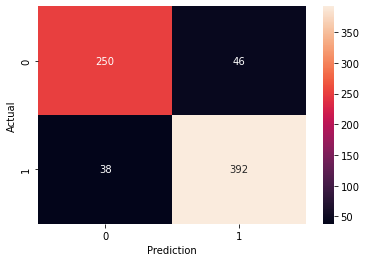

In [92]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

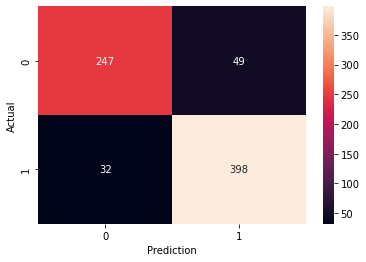

In [93]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb_tuned), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

##### MODEL EVALUATION

In [94]:
#base model
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       296
           1       0.89      0.91      0.90       430

    accuracy                           0.88       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.88      0.88      0.88       726



In [95]:
#tuned model
print(classification_report(y_test, y_pred_gb_tuned))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       296
           1       0.89      0.93      0.91       430

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



In [96]:
# Accuracy base model
print("CV Accuracy :", cv_score(model, X_train, y_train, "accuracy",5))

CV Accuracy : (0.8980770372128909, 0.8984206777850318)


In [97]:
# Accuracy tuned model
print("CV Accuracy :", cv_score(model_tuned, X_train, y_train, "accuracy",5))

CV Accuracy : (0.9011769244465547, 0.9018671731260015)


### MODEL CONCLUSION

In [98]:
print("Accuracy Logistic      = ", accuracy_score(y_test, y_pred_log_tuned))
print("Accuracy Decision Tree = ", accuracy_score(y_test, y_pred_dec_tuned))
print("Accuracy GBC           = ", accuracy_score(y_test, y_pred_gb_tuned))

Accuracy Logistic      =  0.8787878787878788
Accuracy Decision Tree =  0.8870523415977961
Accuracy GBC           =  0.8884297520661157
